In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))
    plt.savefig('{}.eps'.format(filename))

In [3]:
results0 = np.loadtxt("time.txt")
results1 = np.loadtxt("susceptible.txt")
results2 = np.loadtxt("infectd.txt")
results3 = np.loadtxt("INFasymp.txt")
results4 = np.loadtxt("recoverd.txt")
results5 = np.loadtxt("RECasymp.txt")

results6 = np.loadtxt("days.txt")
results7 = np.loadtxt("cases.txt")
results8 = np.loadtxt("wellness.txt")

results9 = np.loadtxt("rmse_train_loss.txt")

results10 = np.loadtxt("beta.txt")
results11 = np.loadtxt("xi.txt")
results12 = np.loadtxt("gamma.txt")
results13 = np.loadtxt("mu.txt")


In [4]:
# All have this shape

print(results0.shape)
print(results1.shape)
print(results2.shape)
print(results3.shape)
print(results4.shape)
print(results5.shape)

print(results6.shape)
print(results7.shape)
print(results8.shape)

print(results9.shape)

print(results10.shape)
print(results11.shape)
print(results12.shape)
print(results13.shape)

(10, 3000)
(10, 3000)
(10, 3000)
(10, 3000)
(10, 3000)
(10, 3000)
(316,)
(316,)
(316,)
(10, 400)
(10,)
(10,)
(10,)
(10,)


In [5]:
print(results1.shape)
c1 = np.zeros((10,316))
c2 = np.zeros((10,316))
c3 = np.zeros((10,316))
c4 = np.zeros((10,316))
c5 = np.zeros((10,316))


(10, 3000)


In [6]:
import datetime
import matplotlib.dates as mdates
import pandas as pd
from scipy.interpolate import CubicSpline

days = pd.date_range(start='1/31/20',end='12/11/20') 
dd = np.arange(len(days))

#print(dd)

for i in range(0,10):
    a1 = CubicSpline(results0[0,:],results1[i,:])
    a2 = CubicSpline(results0[0,:],results2[i,:])
    a3 = CubicSpline(results0[0,:],results3[i,:])
    a4 = CubicSpline(results0[0,:],results4[i,:])
    a5 = CubicSpline(results0[0,:],results5[i,:])
    c1[i,:] = a1(dd)
    c2[i,:] = a2(dd)
    c3[i,:] = a3(dd)
    c4[i,:] = a4(dd)
    c5[i,:] = a5(dd)

a6 = CubicSpline(results6,results7)
c6 = a6(dd)
a8 = CubicSpline(results6,results8)
c8 = a8(dd)

# Generate some random date-time data
numdays1 = 316
base1 = datetime.date.fromisoformat('2020-01-20')
date_list1 = [base1 + datetime.timedelta(days=x) for x in range(0, numdays1)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


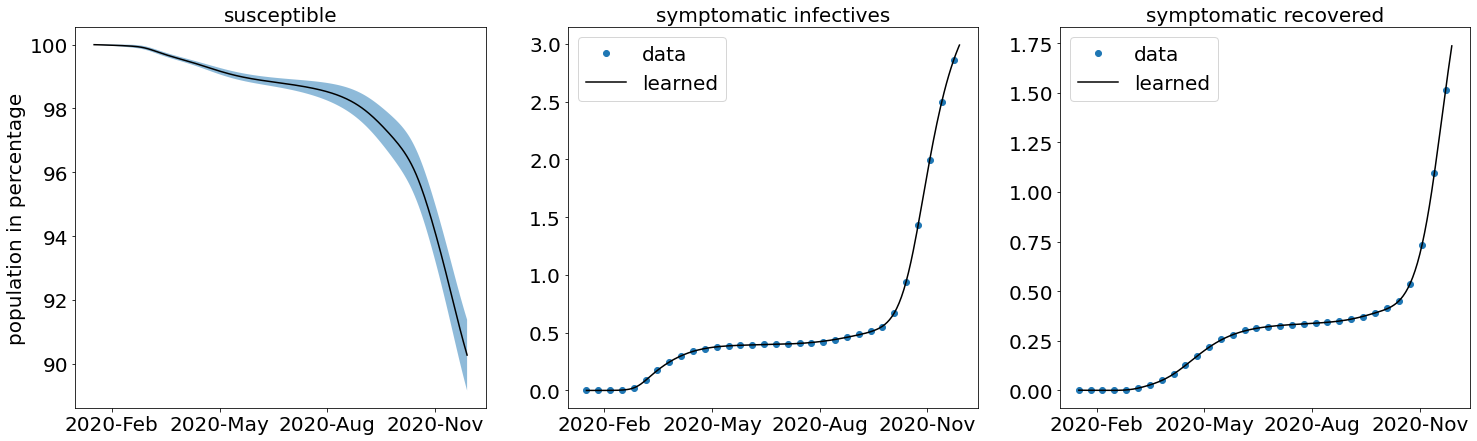

In [22]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(25, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))

ax0.set_title('susceptible',fontsize = 20)
#ax0.plot(results0[0,:],np.mean(results1,0),'k')
ax0.plot(date_list1,np.mean(c1,0) ,'k')
ax0.fill_between(date_list1,
np.mean(c1,0)-(1.96*np.std(c1,0)/np.sqrt(c1.shape[0])),
np.mean(c1,0)+(1.96*np.std(c1,0)/np.sqrt(c1.shape[0])),
alpha=0.5)
#ax0.set_xticklabels(results6, fontsize=16)
ax0.xaxis.set_major_locator(DayLocator())
ax0.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax0.xaxis.set_major_locator(mdates.WeekdayLocator(interval=13))
#ax0.set_xlabel('days',fontsize = 20)
ax0.set_ylabel('population in percentage',fontsize = 20)
ax0.tick_params(labelsize=20)

ax1.set_title('symptomatic infectives',fontsize = 20)
#ax1.plot(results6,results7,'o',markevery=10)
ax1.plot(date_list1,c6,'o',markevery=10)
ax1.plot(date_list1,np.mean(c2,0),'k')
ax1.fill_between(date_list1,                 
 np.mean(c2,0)-(1.96*np.std(c2,0)/np.sqrt(c2.shape[0])),
 np.mean(c2,0)+(1.96*np.std(c2,0)/np.sqrt(c2.shape[0])),
 alpha=0.5)
ax1.xaxis.set_major_locator(DayLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=13))
#ax1.set_xlabel('days',fontsize = 20)
ax1.legend(('data','learned'),loc='best',fontsize = 20)
ax1.tick_params(labelsize=20)

ax2.set_title('symptomatic recovered',fontsize = 20)
#ax2.plot(results6,results8,'o',markevery=10)
ax2.plot(date_list1,c8,'o',markevery=10)
ax2.plot(date_list1,np.mean(c4,0),'k')
ax2.fill_between(date_list1,
 np.mean(c4,0)-(1.96*np.std(c4,0)/np.sqrt(c4.shape[0])),
 np.mean(c4,0)+(1.96*np.std(c4,0)/np.sqrt(c4.shape[0])),
 alpha=0.5)
ax2.xaxis.set_major_locator(DayLocator())
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=13))
#ax2.set_xlabel('days',fontsize = 20)
ax2.legend(('data','learned'),loc='best',fontsize = 20)
ax2.tick_params(labelsize=20)


savefig('./figures/italy_learn_params_01_new')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


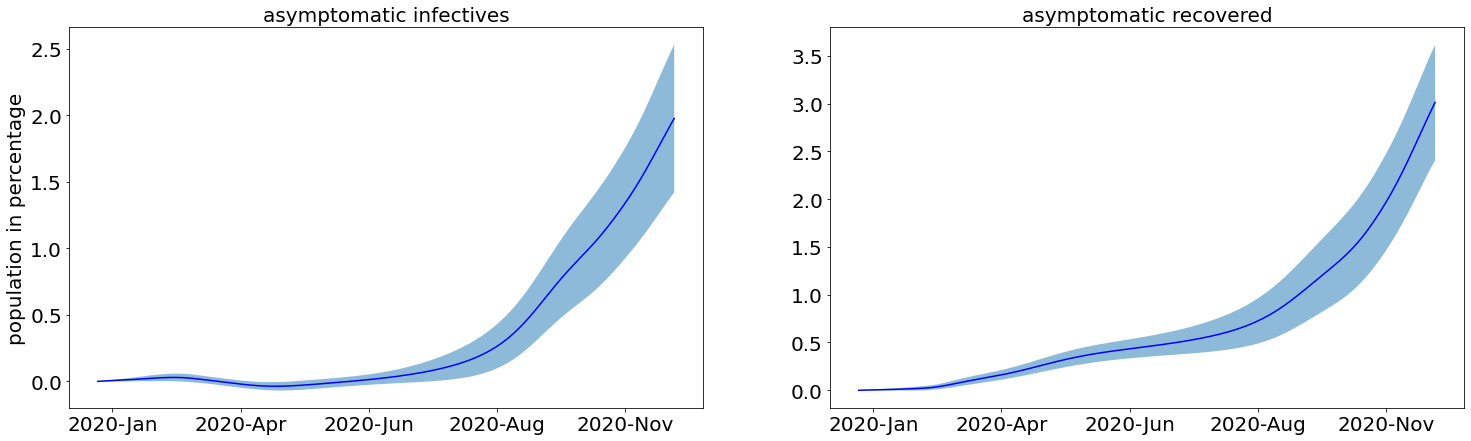

In [23]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(25, 7))

ax3.set_title('asymptomatic infectives',fontsize = 20)
#ax3.plot(results0[0,:],np.mean(results3,0),'b')
ax3.plot(date_list1,np.mean(c3,0) ,'b')
ax3.fill_between(date_list1,
 np.mean(c3,0)-(1.96*np.std(c3,0)/np.sqrt(c3.shape[0])),
 np.mean(c3,0)+(1.96*np.std(c3,0)/np.sqrt(c3.shape[0])),
 alpha=0.5)
ax3.xaxis.set_major_locator(DayLocator())
ax3.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
#ax3.set_xlabel('days',fontsize = 20)
ax3.set_ylabel('population in percentage',fontsize = 20)
ax3.tick_params(labelsize=20)

ax4.set_title('asymptomatic recovered',fontsize = 20)
#ax4.plot(results0[0,:],np.mean(results5,0),'b')
ax4.plot(date_list1,np.mean(c5,0) ,'b')
ax4.fill_between(date_list1,
 np.mean(c5,0)-(1.96*np.std(c5,0)/np.sqrt(c5.shape[0])),
 np.mean(c5,0)+(1.96*np.std(c5,0)/np.sqrt(c5.shape[0])),
 alpha=0.5)
ax4.xaxis.set_major_locator(DayLocator())
ax4.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax4.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
#ax4.set_xlabel('days',fontsize = 20)
ax4.tick_params(labelsize=20)

savefig('./figures/italy_learn_params_02_new')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


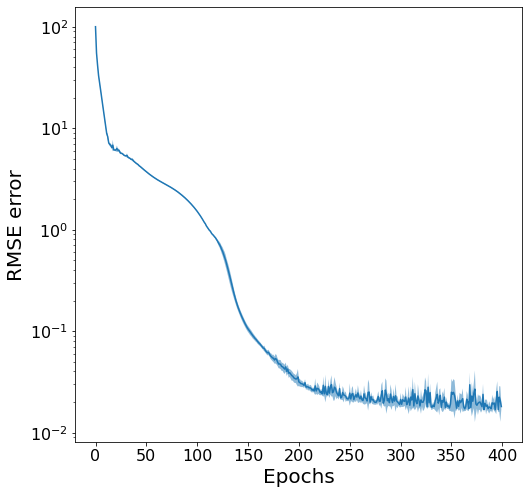

In [9]:
fig, ax5 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8, 8))

ax5.semilogy(np.arange(0,results9.shape[1]),
 np.mean(results9,0))
ax5.fill_between(np.arange(0,results9.shape[1]),
 np.mean(results9,0)-(1.96*np.std(results9,0)/np.sqrt(results9.shape[0])),
 np.mean(results9,0)+(1.96*np.std(results9,0)/np.sqrt(results9.shape[0])),
 alpha=0.5)
ax5.set_xlabel('Epochs',fontsize = 20)
ax5.set_ylabel('RMSE error',fontsize = 20)
ax5.tick_params(labelsize=16)

savefig('./figures/italy_learn_params_03_new')


In [10]:
# mean and std of the parameters

mean_beta = np.mean(results10)
mean_xi = np.mean(results11)
mean_gamma = np.mean(results12)
mean_mu = np.mean(results13)

std_beta = np.std(results10)
std_xi = np.std(results11)
std_gamma = np.std(results12)
std_mu = np.std(results13)


In [11]:
print(mean_beta)
print(std_beta)

0.03772874
0.0027584276189380062


In [12]:
print(mean_xi)
print(std_xi)

0.556990934
0.0789567171861222


In [13]:
print(mean_gamma)
print(std_gamma)

0.013268414000000001
0.00026813820922054336


In [14]:
print(mean_mu)
print(std_mu)

0.029063371999999997
0.017477867692795822


In [15]:
k = len(results10)
R0 = np.zeros(k)

for i in range(0,k):
    R0[i] = results10[i]*(results11[i]*results13[i] + (1-results11[i])*results12[i])/(results13[i]*results12[i])



In [16]:
mean_R0 = np.mean(R0)
print(mean_R0)

2.327700056463468


In [17]:
std_R0 = np.std(R0)
print(std_R0)

0.060139343422415205


In [18]:
print(R0)

[2.26384461 2.3723764  2.28673146 2.38890365 2.42089057 2.32048071
 2.33076242 2.20386822 2.34140577 2.34773676]
